In [99]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib import cm

In [100]:
def likelyhood(m):
    # Calculate the likelyhood of person being at m
    
    x0=np.array([12,4]) 
    x1=np.array([5,7])  
    d0=3.9              
    d1=4.5
    var0=1
    var1=1.5
    
    # calculate the expected distance using the measurements given
    d0_hat = math.sqrt(np.sum(np.square(m-x0)))
    d1_hat = math.sqrt(np.sum(np.square(m-x1)))
    
    # evaluate the sensor model
    pdf_0 = scipy.stats.norm.pdf(d0,d0_hat,math.sqrt(var0))
    pdf_1 = scipy.stats.norm.pdf(d1,d1_hat,math.sqrt(var1))
    
    return pdf_0*pdf_1

In [101]:
# locations of interest
m_0=np.array([10,8]) #uni
m_1=np.array([6,3]) #home
x_0=np.array([12,4])
x_1=np.array([5,7])


# mesh grid for plotting
x=np.arange(3,15,0.5)
y=np.arange(-5,15,0.5)
X,Y=np.meshgrid(x,y)

z =  np.array([likelyhood(np.array([x, y])) for x, y in zip(X.flatten(), Y.flatten())])
Z = z.reshape(X.shape)

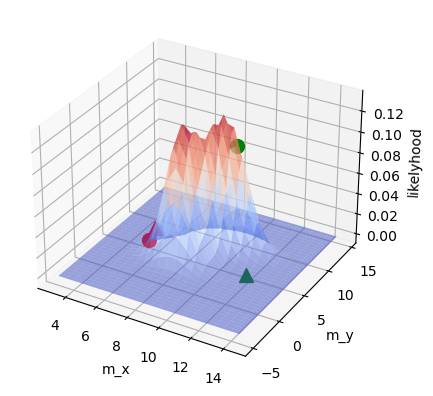

In [104]:
# plot
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=cm.coolwarm, alpha=0.5)
ax.scatter(m_0[0], m_0[1], likelyhood(m_0), c='g', marker='o', s=100)
ax.scatter(m_1[0], m_1[1], likelyhood(m_1), c='r', marker='o', s=100)
ax.scatter(x_0[0], x_0[1], likelyhood(x_0), c='g', marker='^', s=100)
ax.scatter(x_1[0], x_1[1], likelyhood(x_1), c='r', marker='^', s=100)

ax.set_xlabel('m_x')
ax.set_ylabel('m_y')
ax.set_zlabel('likelyhood')

plt.show()